# Project 2 - Source coding, data compression and channel coding

The goal of this second project is to apply some of the principles seen in the lectures about source coding, data compression and channel coding. We ask you to write a brief report (pdf format) collecting your answers to the different questions. All codes must be written in Python inside this Jupyter. Note that you can not change the content of locked cells or import any extra Python library than the ones already imported (numpy).

## Implementation

In this project, you will need to use implement source coding algorithms to answer several questions. Therefore, in this first part, you are asked to write several functions that implement two of the  algorithms seen in the theoretical lectures and one new algorithm described in the project statement. Remember that you need to fill in this Jupyter Notebook to answer these questions. Pay particular attention to the required input and output format of each function.

In [28]:
# [Locked Cell] You can not import any extra Python library in this Notebook.
import numpy as np

### Question 1
Implement a function that returns a binary Huffman code for a given probability distribution. Give the main steps of your implementation. Verify your code on Exercise 7 of the second exercise session (TP2), and report the output of your code for this example. Explain how to extend your function to generate a Huffman code of any (output) alphabet size. 


In [29]:
def getProb(item):
    """
    Return the probability of the item when a tupels array is given
    """
    return item[0]

def Huffman_code(probability_dict):
    """
    Create the Huffman code for given probabilities

    Arguments:
    ----------
    probability_dict:
    - keys: symbol as character or string
    - values: probability of the symbol as a float or double
    Example: {"A": 0.25, "B":0.5,"C":0.125,"D":0.125}

    Return:
    -------
    - codewords: dictionary with the name and the corresponding codeword
    - keys: symbol as character or string
    - values: associated codeword as a character or a string
    Example: {"A": "10", "B":"0","C":"111","D":"110"}

    """
    symbols = list(probability_dict.keys())
    probabilities = list(probability_dict.values())

    codewords = {}

    huffman_builder = []
    for i in range(len(probabilities)):
        huffman_builder.append(([symbols[i]], probabilities[i]))

    while len(huffman_builder) > 1:
        tuples = [(x[1], x) for x in huffman_builder]
        tuples.sort(key=getProb)
        huffman_builder = [x[1] for x in tuples]

        left_node = huffman_builder.pop(0)
        right_node = huffman_builder.pop(0)

        for s in list(left_node[0]):
            if s in codewords:
                codewords[s].insert(0, '1')
            else:
                codewords[s] = ['1']
        for s in list(right_node[0]):
            if s in codewords:
                codewords[s].insert(0, '0')
            else:
                codewords[s] = ['0']

        new_key = left_node[0] + right_node[0]
        new_probs = left_node[1] + right_node[1]

        huffman_builder.append((new_key,new_probs))

    for s in codewords.keys():
        codewords[s] = ''.join(codewords[s])

    return codewords

### Question 2

Given a sequence of symbols, implement a function that returns a dictionary and the encoded sequence using the on-line Lempel-Ziv algorithm (see State of the art in data compression, slide 50/53). Reproduce and report the example given in the course. 

In [30]:
def LZ_online(sequence):
    """
    The on-line Lempel-Ziv algorithm given a sequence of symbols
    Arguments:
    ----------
    - sequence : Sequence of symbols in the string format

    Return:
    -------
    - dictionary : the computed dictionnary in the form:
        - keys: symbol as character or string
        - values: associated codeword as a tuple composed of the entry index (integer) and a binarized adress with one appended symbol (character or string)
        Example: {'': (0, ''), '0': (1, '0'), '1': (2, '01'), '00': (3, '010'), '10': (4, '100')}
    - encoded_sequence : the encoded sequence in the string format
    """

    dictionary = {'': (0, '')}
    encoded_sequence = ''
    next_index = 1
    i = 0

    while i < len(sequence):

        prefix = ''
        buf_prefix = ''
        j = i
        next_index_log = np.ceil(np.log2(next_index))

        while prefix in dictionary and j < len(sequence):
            buf_prefix = prefix
            prefix += sequence[j]
            j += 1

        if prefix not in dictionary and len(prefix) == 1:

            prefix = buf_prefix
            prefix_dic = dictionary[prefix]

            prefix_index = '{0:b}'.format(prefix_dic[0])
            encoded_sequence += sequence[j - 1].zfill(int(next_index_log + 1)) #format(entry_index, 'b').zfill(num_bits) + symbol #prefix_dic[1] + sequence[j - 1]

            dictionary[prefix + sequence[j - 1]] = (next_index, sequence[j - 1].zfill((int(next_index_log + 1))))
            next_index += 1
            i = j
        if prefix not in dictionary and len(prefix) > 1:
            prefix = buf_prefix
            prefix_dic = dictionary[prefix]

            prefix_index = '{0:b}'.format(prefix_dic[0])
            encoded_sequence += prefix_index.zfill(int(next_index_log)) + sequence[j - 1] #format(entry_index, 'b').zfill(num_bits) + symbol #prefix_dic[1] + sequence[j - 1]

            dictionary[prefix + sequence[j - 1]] = (next_index, prefix_index.zfill(int(next_index_log)) + sequence[j - 1])
            next_index += 1
            i = j
        else:
                i = j

    return dictionary, encoded_sequence


### Question 3 : Compare (without implementing the basic version) the two versions of the Lempel-Ziv algorithm seen in the theoretical course (i.e., the basic and the on-line versions).
Discuss what are the (practical) advantages and drawbacks of each version.

-> see pdf report

### Question 4

Implement a function that returns the encoded sequence using the LZ77 algorithm as described by the algorithm below given an input string and a sliding window size l. Reproduce the example given in Figure 2 with window_size=7.

In [31]:
def LZ77(sequence, window_size=7):
    """
    The Lempel-Ziv 77 algorithm given a sequence of symbols and the sliding window size
    
    Arguments:
    ----------
    - sequence : Sequence of symbols in the string format
    - window_size : sliding window size as an integer
    
    Return:
    -------
    - encoded_sequence : the encoded sequence in the string format
    """
    encoded_sequence = ''
    i = 0

    while i < len(sequence):
        in_window_index = max(0, i - window_size)
        window_symbols = sequence[in_window_index:i]

        offset = 0
        buffer = ''
        prefix = sequence[i]

        j = i
        while window_symbols.rfind(prefix) != -1 and j <= len(sequence):
            buffer = prefix
            offset = len(window_symbols) - window_symbols.rfind(prefix)
            j += 1
            prefix = sequence[i : j]
        prefix = buffer

        if prefix == '':
            encoded_sequence += '00' + sequence[j]
            i += 1
        else:
            if j > len(sequence):
                encoded_sequence += str(offset) + str(len(prefix))
                i += len(prefix) + 1
            else:
                encoded_sequence += str(offset) + str(len(prefix)) + sequence[i + len(prefix)]
                i += len(prefix) + 1
    return encoded_sequence

In [33]:
# [Locked Cell] Evaluation of your functions by the examiner. 
# You don't have access to the evaluation, this will be done by the examiner.
# Therefore, this cell will return nothing for the students.
import os
if os.path.isfile("private_evaluation.py"):
    from private_evaluation import unit_tests
    unit_tests(Huffman_code, LZ_online, LZ77)

## Source coding and reversible (lossless) data compression


### Question 5 : Write a function to read and display both images.
Give the number of symbols needed for each image and the size of the two different representation in bytes.

In [34]:
from io import BytesIO
from PIL import Image

def read_and_display_images(pixel_file, png_file):
    """
    Read and display raw grayscale image and PNG-encoded image.

    Arguments:
    ----------
    - pixel_file: File containing raw grayscale image pixels.
    - png_file: File containing PNG-encoded image.
    """

    with open(pixel_file, "r") as f:
        raw_hex = f.read().replace('\r\n', ' ')
    hex_list = raw_hex.split(' ')
    raw_pixels = bytes.fromhex(raw_hex)

    with open(png_file, "rb") as f2:
        png_bytes = f2.read()

    image_raw = Image.frombytes('L', (512, 512), raw_pixels)
    image_raw.show()

    png_bytes = bytes.fromhex(png_bytes.decode('utf-8'))
    image_png = Image.open(BytesIO(png_bytes))
    image_png.show()

    num_symbols = 512 * 512
    raw_file_length = len(raw_pixels)
    png_file_length = len(png_bytes)

    # Print results
    print(f"Number of symbols: {num_symbols}")
    print(f"Raw file length (bytes): {raw_file_length}")
    print(f"PNG file length (bytes): {png_file_length}")
    return

In [35]:
pixel_file = 'data/pixel.txt'
png_file = 'data/PNG.txt'

read_and_display_images(pixel_file, png_file)

Number of symbols: 262144
Raw file length (bytes): 262144
PNG file length (bytes): 160552


### Question 6 :Estimate the marginal probability distribution of all symbols


In [36]:
def estimate_marginal_probabilities(hex_list):
    """
    Estimate the marginal probability distribution of all symbols.

    Arguments:
    ----------
    - png_file: File containing raw grayscale image pixels.

    Return:
    -------
    - marginal_probabilities: Dictionary containing the marginal probability distribution of all symbols.
    - hex_list: List of hexadecimal symbols in the order of appearance in the PNG file.
    """
    #compute the marginal probabilities of all symbols in hex_list
    marginal_probability_dist = {}
    for i in hex_list:
        if i in marginal_probability_dist:
            marginal_probability_dist[i] += 1
        else:
            marginal_probability_dist[i] = 1

    for i in marginal_probability_dist:
        marginal_probability_dist[i] = marginal_probability_dist[i] / len(hex_list)

    return marginal_probability_dist


In [37]:
def encode_png(hex_list, huffman_code):
    """
    Encode the PNG image using Huffman coding.
    hex_list: List of hexadecimal symbols in the order of appearance in the PNG file.
    huffman_code: Dictionary containing the Huffman code for each symbol.
    Return:
    -------
    - encoded_png: Encoded PNG image.
    """
    encoded_png = ''
    for i in range(len(hex_list)):
        if hex_list[i] in huffman_code:
            encoded_png += huffman_code[hex_list[i]]
        else:
            print('error')
            return -1
    return encoded_png

In [38]:
with open(png_file, "r") as f2:
    png_hex = f2.read()
    png_hex = png_hex.replace('\n', ' ')
hex_list = png_hex.split(' ')
hex_list = [x for x in hex_list if x != '']

ascii_list = []
for i in hex_list:
    if int(i, 16) > 31:
        ascii_list.append(chr(int(i, 16)))
    elif int(i, 16) == 48:
        ascii_list.append(chr(303))
    elif int(i, 16) == 49:
        ascii_list.append(chr(304))
    else:
        ascii_list.append(chr(0xFF + int(i, 16)))

marginal_probs = estimate_marginal_probabilities(ascii_list)
huffman_code = Huffman_code(marginal_probs)
encoded_png_huffman = encode_png(ascii_list, huffman_code)

compression_rate = (  (len(ascii_list)*8)/len(encoded_png_huffman))
print('Encoded sequence length :', len(encoded_png_huffman), '\nRaw PNG sequence length :', len(hex_list)*8)
print('Compression Rate :', compression_rate)

Encoded sequence length : 1280279 
Raw PNG sequence length : 1284416
Compression Rate : 1.0032313269217101


### Question 7 : Give the expected average length for your Huffman code.
Compare this value with (a) the empirical average length, and (b) theoretical bound(s).

In [39]:
import random

theoretical_average_length = 0

for i in huffman_code:
    theoretical_average_length += len(huffman_code[i]) * marginal_probs[i]

kraft_inequality = 0
for i in huffman_code:
    kraft_inequality += 2 ** (-len(huffman_code[i]))

shannon_entropy = 0
for i in marginal_probs:
    shannon_entropy += marginal_probs[i] * np.log2(1 / marginal_probs[i])

message_length = 10
nb_reps = 100
empirical_average_length = 0

for i in range(nb_reps):
    seq = random.choices(list(marginal_probs.keys()), weights=list(marginal_probs.values()), k=message_length)
    encoded_png = encode_png(seq, huffman_code)
    empirical_average_length += (len(encoded_png) / message_length)
empirical_average_length /= nb_reps

kraft_inequality = 0
for i in huffman_code:
    kraft_inequality += 2 ** (-len(huffman_code[i]))

print('Theoretical average length :', theoretical_average_length, 'bits/symbol')
print('Empirical average length :', empirical_average_length, 'bits/symbol')
print('Shannon entropy :', shannon_entropy, 'bits/symbol')
print('Kraft inequality is respected :', kraft_inequality <= 1)

Theoretical average length : 7.974232647366583 bits/symbol
Empirical average length : 7.974 bits/symbol
Shannon entropy : 7.957359831200664 bits/symbol
Kraft inequality is respected : True


### Question 8 : Plot the evolution of the empirical average length of the encoded PNG using your Huffman code for increasing input sequence lengths.

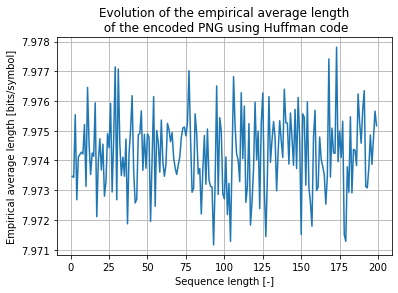

In [40]:
import matplotlib.pyplot as plt

binary_lengths = []
lengths = []
nb_reps = 10000

for j in range(1, 200):

    empirical_average_length = 0
    for i in range(nb_reps):
        seq = random.choices(list(marginal_probs.keys()), weights=list(marginal_probs.values()), k=message_length)
        encoded_png = encode_png(seq, huffman_code)
        empirical_average_length += (len(encoded_png) / message_length)
    empirical_average_length /= nb_reps

    lengths.append(j)
    binary_lengths.append(empirical_average_length)

plt.plot(lengths, binary_lengths)
plt.title('Evolution of the empirical average length\n of the encoded PNG using Huffman code')
plt.xlabel('Sequence length [-]')
plt.ylabel('Empirical average length [bits/symbol]')
plt.grid()
plt.savefig('out.png', format='png', dpi=300, bbox_inches='tight')


### Question 9 : Encode the PNG sequence using the on-line Lempel-Ziv algorithm.
Give the total length of the encoded sequence and the compression rate.

In [41]:
def encode_png_online(list):
    """
    Encode the PNG sequence using the on-line Lempel-Ziv algorithm.

    Arguments:
    ----------
    - hex_list: List of hexadecimal symbols in the order of appearance in the PNG file.

    Return:
    -------
    - encoded_png: Encoded PNG image.
    """
    encoded_png = LZ_online(list)
    return encoded_png

In [42]:
(online_dict, encoded_png_online) = encode_png_online(ascii_list)
ascii_counter = 0
print('Pre-treatment length : ',len(encoded_png_online))
for s in encoded_png_online:
    if s != '0' and s != '1':
        ascii_counter += 1

bits_nb_in_encoded_online = (ascii_counter * 8) + (len(encoded_png_online) - ascii_counter)
print('LZ-Online encoded sequence length : ', bits_nb_in_encoded_online/8, 'bytes \nRaw PNG sequence length : ', len(ascii_list), 'bytes')
print('Compression Rate :', (  (len(ascii_list)*8 / bits_nb_in_encoded_online)))

Pre-treatment length :  1070609
LZ-Online encoded sequence length :  191733.625 bytes 
Raw PNG sequence length :  160552 bytes
Compression Rate : 0.8373700752802228


### Question 10 : Encode the PNG sequence using the LZ77 algorithm with window_size=7.
Give the total length of the encoded sequence and the compression rate.

In [43]:
encoded_png_LZ77 = LZ77(''.join(ascii_list), window_size=7)

nb_bits_in_encoded_LZ77 = len(encoded_png_LZ77) * (3+3+8)/3

print('LZ77 encoded sequence length : ', nb_bits_in_encoded_LZ77/8, 'bytes \nRaw PNG sequence length : ', len(ascii_list), 'bytes')
print('Compression Rate :', ((len(ascii_list)*8)/ nb_bits_in_encoded_LZ77 ))

LZ77 encoded sequence length :  271104.75 bytes 
Raw PNG sequence length :  160552 bytes
Compression Rate : 0.5922138951825816


### Question 11 : Famous data compression algorithms combine the LZ77 algorithm and the Huffman algorithm.
Explain two ways of combining those algorithms and discuss the interestof the possible combinations.

-> see pdf report

### Question 12 : Encode the PNG using one of the combinations of LZ77 and Huffman algorithms you proposed in the previous question.
Give the total length of the encoded PNG sequence and the compression rate.

In [44]:
encoded_png_combination = LZ77(encoded_png_huffman, window_size=7)
bits_nb_in_encoded_combination = len(encoded_png_combination) * (3+3+1)/3
print('Encoded sequence length : ', bits_nb_in_encoded_combination/8, 'bytes \nEncoded sequence huffman length :', len(encoded_png_huffman)/8,'bytes \nRaw PNG sequence length : ', len(ascii_list), 'bytes')
print('Compression Rate :', ((len(ascii_list)*8 / bits_nb_in_encoded_combination)))

Encoded sequence length :  303766.4583333333 bytes 
Encoded sequence huffman length : 160034.875 bytes 
Raw PNG sequence length :  160552 bytes
Compression Rate : 0.5285376169603979


### Question 13 : Report the total lengths and compression rates using (a) LZ77 and (b) the combination of LZ77 and Huffman.
To encode the PNG sequence for different value  of the sliding window size (use sliding window sizes from 1 to 11000 with a step of 1000). Compare your result with the total length and compression rate obtained using the on-line Lempel-Ziv algorithm. Discuss your results.

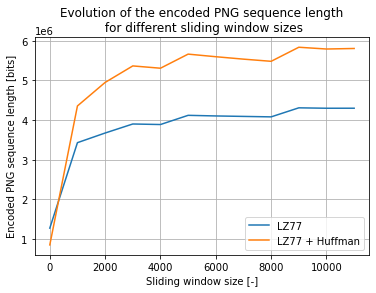

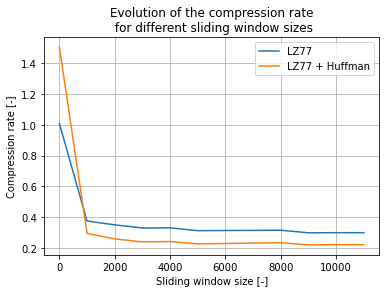

In [45]:
lz77_list = []
combination_list = []

lz77_rate = []
combination_rate = []

window_size_list = []
joined_list = ''.join(ascii_list)
for sliding_size in range(1, 11002, 1000):
    if sliding_size != 1:
        sliding_size -= 1

    lz_77_val = len(LZ77(joined_list, window_size=sliding_size)) * (np.ceil(np.log2(sliding_size))+np.ceil(np.log2(sliding_size))+8)/3
    combination_val = len(LZ77(encoded_png_huffman, window_size=sliding_size)) * (np.ceil(np.log2(sliding_size))+np.ceil(np.log2(sliding_size))+1)/3

    lz77_list.append(lz_77_val)
    combination_list.append(combination_val)
    window_size_list.append(sliding_size)

    lz77_rate.append(( (len(ascii_list)*8)/ lz_77_val ))
    combination_rate.append((len(encoded_png_huffman) / combination_val))

plt.plot(window_size_list, lz77_list, label='LZ77')
plt.plot(window_size_list, combination_list, label='LZ77 + Huffman')
plt.title('Evolution of the encoded PNG sequence length\n for different sliding window sizes')
plt.xlabel('Sliding window size [-]')
plt.ylabel('Encoded PNG sequence length [bits]')
plt.legend()
plt.grid()
plt.show()

plt.clf()
plt.plot(window_size_list, lz77_rate, label='LZ77')
plt.plot(window_size_list, combination_rate, label='LZ77 + Huffman')
plt.title('Evolution of the compression rate\n for different sliding window sizes')
plt.xlabel('Sliding window size [-]')
plt.ylabel('Compression rate [-]')
plt.legend()
plt.grid()
plt.show()


### Question 14 : Instead of encoding the PNG sequence, encode directly the pixel values with the binary Huffman algorithm.

In [46]:
with open(pixel_file, "r") as f2:
    png_hex = f2.read()
    png_hex = png_hex.replace('\n', ' ')
hex_list = png_hex.split(' ')
hex_list = [x for x in hex_list if x != '']

ascii_list = []
for i in hex_list:
    if int(i, 16) > 31:
        ascii_list.append(chr(int(i, 16)))
    elif int(i, 16) == 48:
        ascii_list.append(chr(303))
    elif int(i, 16) == 49:
        ascii_list.append(chr(304))
    else:
        ascii_list.append(chr(0xFF + int(i, 16)))
marginal_probs = estimate_marginal_probabilities(ascii_list)
huffman_code = Huffman_code(marginal_probs)
encoded_png_huffman = encode_png(ascii_list, huffman_code)

compression_rate = ((len(ascii_list)*8) / len(encoded_png_huffman) )
print('Encoded sequence length :', len(encoded_png_huffman) / 8, 'bytes \nRaw PNG sequence length :', len(hex_list), 'bytes')
print('Compression Rate :', compression_rate)

Encoded sequence length : 198110.125 bytes 
Raw PNG sequence length : 262144 bytes
Compression Rate : 1.3232236363487226


In [47]:
theoretical_average_length = 0
for i in huffman_code:
    theoretical_average_length += len(huffman_code[i]) * marginal_probs[i]

message_length = 10
nb_reps = 100
empirical_average_length = 0
for i in range(nb_reps):
    seq = random.choices(list(marginal_probs.keys()), weights=list(marginal_probs.values()), k=message_length)
    encoded_png = encode_png(seq, huffman_code)
    empirical_average_length += (len(encoded_png) / message_length)
empirical_average_length /= nb_reps

print('Theoretical average length :', theoretical_average_length, 'bytes/char \nEmpirical average length :', empirical_average_length, 'bytes/char' )

Theoretical average length : 6.045841217041016 bytes/char 
Empirical average length : 6.059999999999999 bytes/char


### Question 15 : Compare the values found at the previous question with the ones found in Question 5.
In particular, is it better to first encode the text with PNG code before the Huffman encoding or to directly encode the pixel image with Huffman? Discuss.

-> see pdf report

## Channel coding

### Question 16: Implement a function to read the text document and encode the text signal using the binary ASCII fixed-length binary code.
Count the number of bits required for the text provided with this assignment (text.txt).

In [48]:
text_file = 'data/text.txt'
def ascii_to_bin_opener(text_file):
    with open(text_file, 'r') as file:
        text = file.read()
    encoded_text = ''.join(format(ord(char), '08b') for char in text)
    return encoded_text, text

(encoded_text, text) = ascii_to_bin_opener(text_file)
print(encoded_text, '\n', text)
print('Number of bits required for the text :', len(encoded_text))
print('Number of bits required for the text :', len(text)*8)
print('length of text :', len(text))

0101010001001000010001010010000001000010010011110101100100100000010101110100100001001111001000000100110001001001010101100100010101000100001000000100110101110010001011100010000001100001011011100110010000100000010011010111001001110011001011100010000001000100011101010111001001110011011011000110010101111001001011000010000001101111011001100010000001101110011101010110110101100010011001010111001000100000011001100110111101110101011100100010110000100000010100000111001001101001011101100110010101110100001000000100010001110010011010010111011001100101001011000010000001110111011001010111001001100101001000000111000001110010011011110111010101100100001000000111010001101111001000000111001101100001011110010010000001110100011010000110000101110100001000000111010001101000011001010111100100100000011101110110010101110010011001010010000001110000011001010111001001100110011001010110001101110100011011000111100100100000011011100110111101110010011011010110000101101100001011000010000001110100011010000110000101101110

### Question 17: Simulate the channel effect on the binary text signal. Then decode the text signal and display the decoded text.

In [49]:
import random

nb_bits_to_flip = 0.02 * len(encoded_text)

for i in range(int(np.ceil(nb_bits_to_flip))):
    index = random.randint(0, len(encoded_text) - 1)
    if encoded_text[index] == '0':
        encoded_text = encoded_text[:index] + '1' + encoded_text[index + 1:]
    else:
        encoded_text = encoded_text[:index] + '0' + encoded_text[index + 1:]

decoded_text = ''
for i in range(0, len(encoded_text), 8):
    decoded_text += chr(int(encoded_text[i:i + 8], 2))
print(decoded_text)
errors = 0
for i in range(len(text)):
    if text[i] != decoded_text[i]:
        errors += 1
print('---------------------')
print('Number of errors:', errors)
print('---------------------')

THE BOY WHO LIVED Mr. aNd Mrs. Dursldy, nf number fo5ò, Pré÷ed DrIv%, were proud`to say,that they were pesfectly`normal, tnanKbyow very`ouch. Tèey we2e the lasT$people you7d expect to ba involved in anyt`ing strange or$mysterioõs, bEca}se they just Didn't hkld wyth such no.qense. Mr. ursley was the dire#tor g a firm cclled Gru~nings, whmch made drills. He uas a big, baeFy man witl hArdly any ngck, although he dil h!ve a very large mustaahm. Mps. Dyrshey was thio and blonde anD had nearly tWice t`E usuad`!munt of"~eck$ which came in very uSeæul as cie spent so$much of hdr tmmg craning ovev garden denges, spying on dhe nehghbors, The Dõrsley { had a seall sof celled Nud|ey ang in uhehr ïpigion thEre as no finep boy`an{÷here.(Th% Dursleys hqd everything phey wanted, But they Adso had A secret, aNd thehr gruauest0fecr$war that$som%bdy0uo5ld discover iô. They didn't think t(ey coUld beaz ht if 1nyone Found out(abgup vhe Potter3 Mrs. PoTter was Mrs. Dursly's qister, bu4 they iadn'v mg

### Question 18: Instead of sending directly through the channel the binary text signal, you will first introduce some redundancy.
To do that, implement a function that returns the Hamming (7,4) code for a given sequence of binary symbols.

In [50]:
def hamming_encode(binary_sequence):
    """
    Returns the Hamming (7,4) code for a given sequence of binary symbols.

    Arguments:
    ----------
    - binary_sequence: Sequence of binary symbols.

    Return:
    -------
    - hamming_code: Hamming (7,4) code for the given sequence of binary symbols.
    """
    G = np.array([[1, 0, 0, 0, 1, 0, 1],
                 [0, 1, 0, 0, 1, 1, 0],
                 [0, 0, 1, 0, 1, 1, 1],
                 [0, 0, 0, 1, 0, 1, 1]])
    s = np.array([int(b) for b in binary_sequence])
    hamming_code = ''.join([str(b) for b in (np.dot(s, G) % 2)])

    return hamming_code


In [51]:
with open('data/text.txt', 'r') as file:
    text = file.read()
encoded_text = ''.join(format(ord(char), '08b') for char in text)

encoded_hamming = ""
for i in range(0, len(encoded_text), 4):
    encoded_hamming += hamming_encode(encoded_text[i:i+4])
print(encoded_hamming)

0101101010011001001101000101010011001011010010111000000001001100010111010011011111110101101100111000101110000000010110101110100100110100010101001101111111001011100000000100110110001101001101001110010110101100010100110010110101001100100110001011100000000100110110100001110100010111001011111101000010111000000001100010001011011000111101000110001010011000101110000000010011011010000111010001011101110100011100001011111101000010111000000001001100100110011101001011010111010001011101110100011100011000111000110110001010110101110101001110001011111000110010111000000001100011111111011000101100010010111000000001100011110100011101001011010110001110100001100010010111011000101011010111010001011100101110000000011000101100010110001111111101110100101101011101000101110010111110001100101110000000010110100000000111010001011101100011001110011101001100010110001010110101110100100110001011100000000100110010011001110100010111011000110011100111010011000101100010101101001011111000110010111000000001110100111010011000

### 19. Simulate the channel effect on the binary text signal with redundancy.
Then decode the binary text signal. Display the decoded text. What do you notice? Explain your decoding procedure.

In [52]:
def hamming_decode(binary_sequence):
    """
    Returns the Hamming (7,4) code for a given sequence of binary symbols.

    Arguments:
    ----------
    - binary_sequence: Sequence of binary symbols.

    Return:
    -------
    - hamming_code: Hamming (7,4) code for the given sequence of binary symbols.
    """
    G = np.array([[1, 0, 0, 0, 1, 0, 1],
                  [0, 1, 0, 0, 1, 1, 0],
                  [0, 0, 1, 0, 1, 1, 1],
                  [0, 0, 0, 1, 0, 1, 1]])

    syndrome_dict = {
        #p1,p2,p3 : d1,d2,d3,d4,p1,p2,p3
        '000': np.array([0, 0, 0, 0, 0, 0, 0]),
        '001': np.array([0, 0, 0, 0, 0, 0, 1]),
        '010': np.array([0, 0, 0, 0, 0, 1, 0]),
        '100': np.array([0, 0, 0, 0, 1, 0, 0]),
        '011': np.array([0, 0, 0, 1, 0, 0, 0]),
        '101': np.array([1, 0, 0, 0, 0, 0, 0]),
        '110': np.array([0, 1, 0, 0, 0, 0, 0]),
        '111': np.array([0, 0, 1, 0, 0, 0, 0])
    }

    s = np.array([int(b) for b in binary_sequence])
    parity_bits = s[4:]
    data = s[:4]

    hamming_verif = np.dot(data, G) % 2
    syndrome = (parity_bits + hamming_verif[4:]) % 2

    correcting_code = syndrome_dict[''.join([str(b) for b in syndrome])]
    s = (s + correcting_code) % 2
    return ''.join([str(b) for b in s[:4]])

In [53]:
nb_bits_to_flip = 0.02 * len(encoded_hamming)

for i in range(int(np.ceil(nb_bits_to_flip))):
    index = random.randint(0, len(encoded_hamming) - 1)
    if encoded_hamming[index] == '0':
        encoded_hamming = encoded_hamming[:index] + '1' + encoded_hamming[index + 1:]
    else:
        encoded_hamming = encoded_hamming[:index] + '0' + encoded_hamming[index + 1:]

decoded_hamming = ""
for i in range(0, len(encoded_hamming), 7):
    decoded_hamming += hamming_decode(encoded_hamming[i:i+7])

decoded_text = ''
for i in range(0, len(decoded_hamming), 8):
    decoded_text += chr(int(decoded_hamming[i:i + 8], 2))
print(decoded_text)
errors = 0
for i in range(len(text)):
    if text[i] != decoded_text[i]:
        errors += 1
print('---------------------')
print('Number of errors:', errors)
print('---------------------')

THE BOY WHO LIVED Mr. and Mrs. Dursley, of$number#four, Privet Drive, were proud to say that they were perfectly normal, thank you very mucx. They were the lqst people you'd exðect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense. Mr. Dursley was the director of a firm#called Grunnings, which made drillu. He was a big, beefy man with hardly any neck, although he did have a#very large mustache. rs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time crening over garden fences, spying on the neighbors. The Dursley s had a small son called Dudley and in their opinion there was no finer boy anyvhere. The DursÌeys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. The} didn't think they could bear it if a.yone found out about the Potters. Mrs. Potter was Mrs. Dursley's sister, but they xadn't me

### Question 20: Given the text document encoded in binary ASCII, implement a Python program tosimulate transmission over a binary symmetric channel.
With a noise probability ranging from 0 to 0.5, with a step of 0.01. Compute the per character error rate for each noise probability, both with and without Hamming (7,4) code. Plot the per
character error rate as a function of the noise probability, and compare the performance with and without Hamming (7,4) code.

In [54]:
with open('data/text.txt', 'r') as file:
    text = file.read()
bin_encoded_text = ''.join(format(ord(char), '08b') for char in text)

bin_encoded_hamming = ""
for i in range(0, len(bin_encoded_text), 4):
    bin_encoded_hamming += hamming_encode(bin_encoded_text[i:i+4])

buf_text = bin_encoded_text
buf_hamming = bin_encoded_hamming
char_errors_rates_hamming = []
char_errors_rates = []
noise_probabilities = []
for i in range(51):
    noise_probabilities.append(i * 0.01)
    nb_bits_to_flip = i * 0.01 * len(bin_encoded_text)
    nb_bits_to_flip_hamming = i * 0.01 * len(bin_encoded_hamming)

    for j in range(int(np.ceil(nb_bits_to_flip))):
        index = random.randint(0, len(bin_encoded_text) - 1)
        if bin_encoded_text[index] == '0':
            bin_encoded_text = bin_encoded_text[:index] + '1' + bin_encoded_text[index + 1:]
        else:
            bin_encoded_text = bin_encoded_text[:index] + '0' + bin_encoded_text[index + 1:]

    for j in range(int(np.ceil(nb_bits_to_flip_hamming))):
        index = random.randint(0, len(bin_encoded_hamming) - 1)
        if bin_encoded_hamming[index] == '0':
            bin_encoded_hamming = bin_encoded_hamming[:index] + '1' + bin_encoded_hamming[index + 1:]
        else:
            bin_encoded_hamming = bin_encoded_hamming[:index] + '0' + bin_encoded_hamming[index + 1:]

    bin_decoded_text = ""
    for j in range(0, len(bin_encoded_text), 8):
        bin_decoded_text += chr(int(bin_encoded_text[j:j + 8], 2))

    buf_bin_decoded_hamming = ""
    for j in range(0, len(bin_encoded_hamming), 7):
        buf_bin_decoded_hamming += hamming_decode(bin_encoded_hamming[j:j+7])
    bin_decoded_hamming = ""
    for j in range(0, len(buf_bin_decoded_hamming), 8):
        bin_decoded_hamming += chr(int(buf_bin_decoded_hamming[j:j + 8], 2))

    errors_text = 0
    errors_hamming = 0
    for j in range(len(text)):
        if text[j] != bin_decoded_text[j]:
            errors_text += 1
        if text[j] != bin_decoded_hamming[j]:
            errors_hamming += 1
    char_errors_rates.append(errors_text / len(text))
    char_errors_rates_hamming.append(errors_hamming / len(text))
    bin_encoded_text = buf_text
    bin_encoded_hamming = buf_hamming

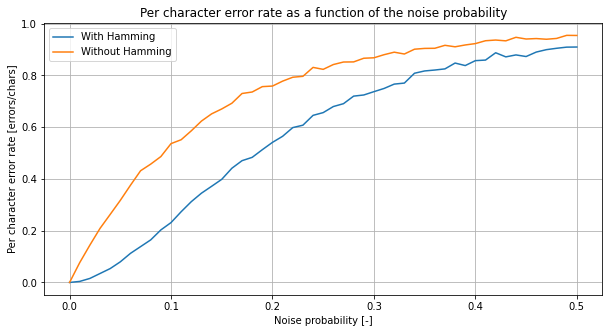

In [55]:
plt.figure(figsize=(10, 5))
plt.title('Per character error rate as a function of the noise probability')
plt.plot(noise_probabilities, char_errors_rates_hamming, label='With Hamming')
plt.plot(noise_probabilities, char_errors_rates, label='Without Hamming')
plt.xlabel('Noise probability [-]')
plt.ylabel('Per character error rate [errors/chars]')
plt.legend()
plt.grid()
plt.show()

### Question 21: How would you proceed to reduce the probability of errors and/or to improve the communication efficiency?
Justify.

-> see pdf report